In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("alltracks.csv", index_col=0)

In [3]:
df

track_name          artist                       album_name  \
0           Untouched        SilenCee                        Untouched   
1               maria           Malte                            maria   
2           let me go           Malte                        let me go   
3             So What             mqx                          So What   
4               maria           Malte                            maria   
...               ...             ...                              ...   
17686       The Tower  Future Islands  People Who Aren’t There Anymore   
17687  King of Sweden  Future Islands  People Who Aren’t There Anymore   
17688  Svefn-g-englar       Sigur Rós                    Ágætis byrjun   
17689  Svefn-g-englar       Sigur Rós                    Ágætis byrjun   
17690           Intro       Sigur Rós                    Ágætis byrjun   

            date_listened         uts  \
0      07 Dec 2022, 09:30  1670405412   
1      07 Dec 2022, 09:18  1670404731   
2      07 Dec 2022, 09:16  1670404596   
3      07 Dec 2022, 09:14  1670404473   
4      07 Dec 2022, 09:11  1670404288   
...                   ...         ...   
17686  17 Jul 2024, 12:51  1721220684   
17687  17 Jul 2024, 12:47  1721220434   
17688  17 Jul 2024, 12:41  1721220115   
17689  17 Jul 2024, 11:46  1721216760   
17690  17 Jul 2024, 11:44  1721216666   

                                                     url        tags  
0         https://www.last.fm/music/SilenCee/_/Untouched  electronic  
1                https://www.last.fm/music/Malte/_/maria      german  
2            https://www.last.fm/music/Malte/_/let+me+go      german  
3                https://www.last.fm/music/mqx/_/So+What   hardstyle  
4                https://www.last.fm/music/Malte/_/maria      german  
...                                                  ...         ...  
17686  https://www.last.fm/music/Future+Islands/_/The...   seen live  
17687  https://www.last.fm/music/Future+Islands/_/Kin...   seen live  
17688  https://www.last.fm/music/Sigur+R%C3%B3s/_/Sve...   post-rock  
17689  https://www.last.fm/music/Sigur+R%C3%B3s/_/Sve...   post-rock  
17690   https://www.last.fm/music/Sigur+R%C3%B3s/_/Intro   post-rock  

[17691 rows x 7 columns]

In [4]:
index_to_delete = df[df['tags'] == '[]'].index
df.drop(index_to_delete, inplace=True)

In [5]:
df

track_name          artist                       album_name  \
0           Untouched        SilenCee                        Untouched   
1               maria           Malte                            maria   
2           let me go           Malte                        let me go   
3             So What             mqx                          So What   
4               maria           Malte                            maria   
...               ...             ...                              ...   
17686       The Tower  Future Islands  People Who Aren’t There Anymore   
17687  King of Sweden  Future Islands  People Who Aren’t There Anymore   
17688  Svefn-g-englar       Sigur Rós                    Ágætis byrjun   
17689  Svefn-g-englar       Sigur Rós                    Ágætis byrjun   
17690           Intro       Sigur Rós                    Ágætis byrjun   

            date_listened         uts  \
0      07 Dec 2022, 09:30  1670405412   
1      07 Dec 2022, 09:18  1670404731   
2      07 Dec 2022, 09:16  1670404596   
3      07 Dec 2022, 09:14  1670404473   
4      07 Dec 2022, 09:11  1670404288   
...                   ...         ...   
17686  17 Jul 2024, 12:51  1721220684   
17687  17 Jul 2024, 12:47  1721220434   
17688  17 Jul 2024, 12:41  1721220115   
17689  17 Jul 2024, 11:46  1721216760   
17690  17 Jul 2024, 11:44  1721216666   

                                                     url        tags  
0         https://www.last.fm/music/SilenCee/_/Untouched  electronic  
1                https://www.last.fm/music/Malte/_/maria      german  
2            https://www.last.fm/music/Malte/_/let+me+go      german  
3                https://www.last.fm/music/mqx/_/So+What   hardstyle  
4                https://www.last.fm/music/Malte/_/maria      german  
...                                                  ...         ...  
17686  https://www.last.fm/music/Future+Islands/_/The...   seen live  
17687  https://www.last.fm/music/Future+Islands/_/Kin...   seen live  
17688  https://www.last.fm/music/Sigur+R%C3%B3s/_/Sve...   post-rock  
17689  https://www.last.fm/music/Sigur+R%C3%B3s/_/Sve...   post-rock  
17690   https://www.last.fm/music/Sigur+R%C3%B3s/_/Intro   post-rock  

[17362 rows x 7 columns]

Check for null values and inspect the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17362 entries, 0 to 17690
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_name     17362 non-null  object
 1   artist         17362 non-null  object
 2   album_name     17362 non-null  object
 3   date_listened  17362 non-null  object
 4   uts            17362 non-null  int64 
 5   url            17362 non-null  object
 6   tags           17362 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

track_name       0
artist           0
album_name       0
date_listened    0
uts              0
url              0
tags             0
dtype: int64

In [8]:
df['artist'].value_counts()

Radiohead        2353
The Strokes       403
The Smile         374
JPEGMAFIA         319
Talking Heads     300
                 ... 
Mark Farina         1
Sampology           1
Ladi6               1
SWEET WHIRL         1
Jay Rock            1
Name: artist, Length: 1247, dtype: int64

In [9]:
artist_counts = df.groupby('artist').agg({
    'track_name': 'count',
    'tags': 'first'
}).reset_index()
artist_counts.rename(columns={'track_name': 'count'}, inplace=True)

artist_counts

artist  count        tags
0                       !!!      2   seen live
1                  100 gecs      7    hyperpop
2     1999 WRITE THE FUTURE      1         rap
3                 21 Savage      3        trap
4                      2562      3     dubstep
...                     ...    ...         ...
1242              ДЕТИ RAVE      2        Rave
1243                 万能青年旅店      1        rock
1244                    久石譲     48  Soundtrack
1245                     光良      1     chinese
1246                     杏里      1       j-pop

[1247 rows x 3 columns]

In [10]:
artist_counts = artist_counts.sort_values(by='count', ascending=False).reset_index(drop=True)
artist_counts

top_10_artists = artist_counts[artist_counts.index < 10]
top_10_artists

artist  count              tags
0                         Radiohead   2353       alternative
1                       The Strokes    403        indie rock
2                         The Smile    374         post-punk
3                         JPEGMAFIA    319           Hip-Hop
4                     Talking Heads    300          new wave
5                             Malte    299            german
6                       Tame Impala    276  Psychedelic Rock
7                   LCD Soundsystem    267        electronic
8                       Frank Ocean    262               rnb
9  King Gizzard & The Lizard Wizard    233  Psychedelic Rock

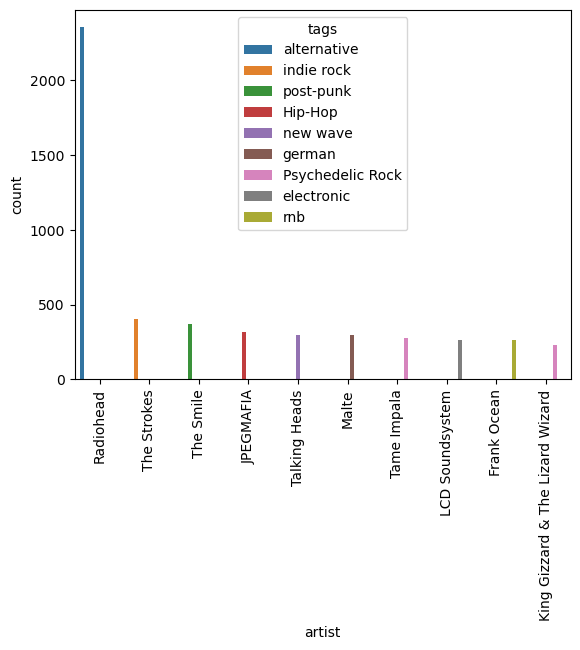

In [11]:
sns.barplot(top_10_artists, x='artist', y='count', hue='tags');
plt.xticks(rotation=90);

In [12]:
df['date_listened'] = pd.to_datetime(df['date_listened'])

In [13]:
df

track_name          artist                       album_name  \
0           Untouched        SilenCee                        Untouched   
1               maria           Malte                            maria   
2           let me go           Malte                        let me go   
3             So What             mqx                          So What   
4               maria           Malte                            maria   
...               ...             ...                              ...   
17686       The Tower  Future Islands  People Who Aren’t There Anymore   
17687  King of Sweden  Future Islands  People Who Aren’t There Anymore   
17688  Svefn-g-englar       Sigur Rós                    Ágætis byrjun   
17689  Svefn-g-englar       Sigur Rós                    Ágætis byrjun   
17690           Intro       Sigur Rós                    Ágætis byrjun   

            date_listened         uts  \
0     2022-12-07 09:30:00  1670405412   
1     2022-12-07 09:18:00  1670404731   
2     2022-12-07 09:16:00  1670404596   
3     2022-12-07 09:14:00  1670404473   
4     2022-12-07 09:11:00  1670404288   
...                   ...         ...   
17686 2024-07-17 12:51:00  1721220684   
17687 2024-07-17 12:47:00  1721220434   
17688 2024-07-17 12:41:00  1721220115   
17689 2024-07-17 11:46:00  1721216760   
17690 2024-07-17 11:44:00  1721216666   

                                                     url        tags  
0         https://www.last.fm/music/SilenCee/_/Untouched  electronic  
1                https://www.last.fm/music/Malte/_/maria      german  
2            https://www.last.fm/music/Malte/_/let+me+go      german  
3                https://www.last.fm/music/mqx/_/So+What   hardstyle  
4                https://www.last.fm/music/Malte/_/maria      german  
...                                                  ...         ...  
17686  https://www.last.fm/music/Future+Islands/_/The...   seen live  
17687  https://www.last.fm/music/Future+Islands/_/Kin...   seen live  
17688  https://www.last.fm/music/Sigur+R%C3%B3s/_/Sve...   post-rock  
17689  https://www.last.fm/music/Sigur+R%C3%B3s/_/Sve...   post-rock  
17690   https://www.last.fm/music/Sigur+R%C3%B3s/_/Intro   post-rock  

[17362 rows x 7 columns]

In [14]:
df.set_index('date_listened', inplace=True)

In [15]:
df

track_name          artist  \
date_listened                                         
2022-12-07 09:30:00       Untouched        SilenCee   
2022-12-07 09:18:00           maria           Malte   
2022-12-07 09:16:00       let me go           Malte   
2022-12-07 09:14:00         So What             mqx   
2022-12-07 09:11:00           maria           Malte   
...                             ...             ...   
2024-07-17 12:51:00       The Tower  Future Islands   
2024-07-17 12:47:00  King of Sweden  Future Islands   
2024-07-17 12:41:00  Svefn-g-englar       Sigur Rós   
2024-07-17 11:46:00  Svefn-g-englar       Sigur Rós   
2024-07-17 11:44:00           Intro       Sigur Rós   

                                          album_name         uts  \
date_listened                                                      
2022-12-07 09:30:00                        Untouched  1670405412   
2022-12-07 09:18:00                            maria  1670404731   
2022-12-07 09:16:00                        let me go  1670404596   
2022-12-07 09:14:00                          So What  1670404473   
2022-12-07 09:11:00                            maria  1670404288   
...                                              ...         ...   
2024-07-17 12:51:00  People Who Aren’t There Anymore  1721220684   
2024-07-17 12:47:00  People Who Aren’t There Anymore  1721220434   
2024-07-17 12:41:00                    Ágætis byrjun  1721220115   
2024-07-17 11:46:00                    Ágætis byrjun  1721216760   
2024-07-17 11:44:00                    Ágætis byrjun  1721216666   

                                                                   url  \
date_listened                                                            
2022-12-07 09:30:00     https://www.last.fm/music/SilenCee/_/Untouched   
2022-12-07 09:18:00            https://www.last.fm/music/Malte/_/maria   
2022-12-07 09:16:00        https://www.last.fm/music/Malte/_/let+me+go   
2022-12-07 09:14:00            https://www.last.fm/music/mqx/_/So+What   
2022-12-07 09:11:00            https://www.last.fm/music/Malte/_/maria   
...                                                                ...   
2024-07-17 12:51:00  https://www.last.fm/music/Future+Islands/_/The...   
2024-07-17 12:47:00  https://www.last.fm/music/Future+Islands/_/Kin...   
2024-07-17 12:41:00  https://www.last.fm/music/Sigur+R%C3%B3s/_/Sve...   
2024-07-17 11:46:00  https://www.last.fm/music/Sigur+R%C3%B3s/_/Sve...   
2024-07-17 11:44:00   https://www.last.fm/music/Sigur+R%C3%B3s/_/Intro   

                           tags  
date_listened                    
2022-12-07 09:30:00  electronic  
2022-12-07 09:18:00      german  
2022-12-07 09:16:00      german  
2022-12-07 09:14:00   hardstyle  
2022-12-07 09:11:00      german  
...                         ...  
2024-07-17 12:51:00   seen live  
2024-07-17 12:47:00   seen live  
2024-07-17 12:41:00   post-rock  
2024-07-17 11:46:00   post-rock  
2024-07-17 11:44:00   post-rock  

[17362 rows x 6 columns]

In [16]:
monthly_counts = df['track_name'].resample('M').count()

monthly_counts = monthly_counts.reset_index()

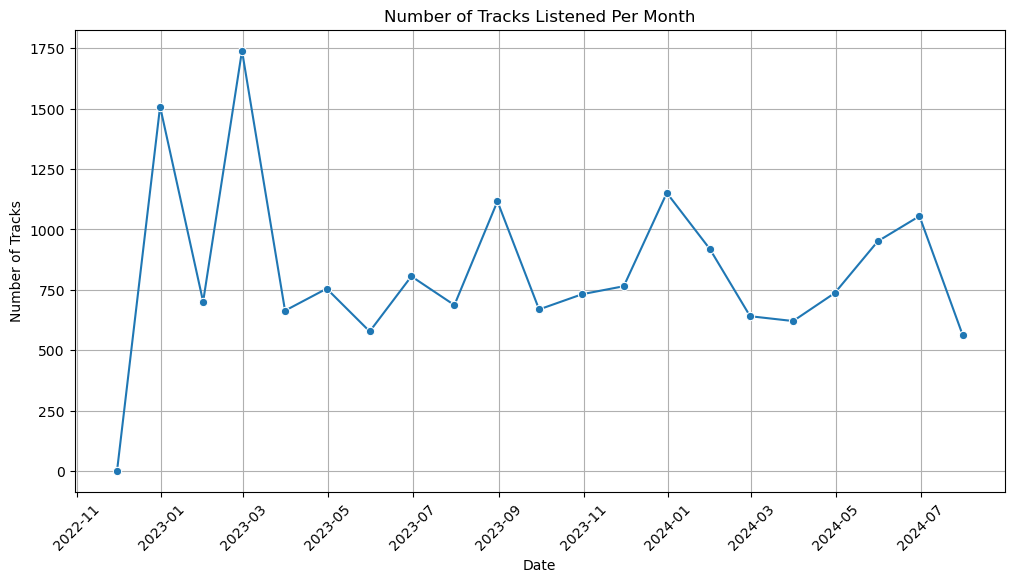

In [17]:
# Plot the data using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_counts, x='date_listened', y='track_name', marker='o')
plt.title('Number of Tracks Listened Per Month')
plt.xlabel('Date')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [18]:
df = df.reset_index()

In [19]:
df['session_id'] = (df['date_listened'].diff() > pd.Timedelta(minutes=1)).cumsum()
df['track_name_artist'] = df['track_name'] + ' - ' + df['artist']

In [20]:
song_id = {}
id_song = {}
for index, song in enumerate(df['track_name_artist'].unique()):
    song_id[song] = index
    id_song[index] = song


In [37]:
song_sequences = []
next_songs = []
for session_id, group in df.groupby('session_id'):
    songs = group['track_name_artist'].tolist()
    for i in range(1,len(songs)):
        sequence_ids = []
        prev_song_id = None
        for index, song in enumerate(songs[:i]):
            current_song_id = song_id[song]
            if current_song_id != prev_song_id:
                sequence_ids.append(current_song_id)
                prev_song_id = current_song_id
        next_song_id = song_id[songs[i]]
        song_sequences.append(sequence_ids)
        next_songs.append(next_song_id)


In [38]:
song_sequences

[[0],
 [0, 1],
 [0, 1, 2],
 [0, 1, 2, 3],
 [0, 1, 2, 3, 1],
 [0, 1, 2, 3, 1, 4],
 [0, 1, 2, 3, 1, 4, 5],
 [0, 1, 2, 3, 1, 4, 5, 6],
 [0, 1, 2, 3, 1, 4, 5, 6, 7],
 [0, 1, 2, 3, 1, 4, 5, 6, 7, 8],
 [0, 1, 2, 3, 1, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 1, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 1, 4, 5, 6, 7, 8, 9, 10],
 [0, 1, 2, 3, 1, 4, 5, 6, 7, 8, 9, 10, 11],
 [0, 1, 2, 3, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [0, 1, 2, 3, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0],
 [0, 1, 2, 3, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0, 13],
 [0, 1, 2, 3, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0, 13, 14],
 [0, 1, 2, 3, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0, 13, 14, 15],
 [0, 1, 2, 3, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0, 13, 14, 15, 16],
 [0, 1, 2, 3, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0, 13, 14, 15, 16, 17],
 [0, 1, 2, 3, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0, 13, 14, 15, 16, 17, 18],
 [0, 1, 2, 3, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0, 13, 14, 15, 16, 17, 18, 10],
 [0,
  1,
  2,
  3,
  1,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  0,
  1

In [22]:
song_sequences

[['Untouched'],
 ['Untouched', 'maria'],
 ['Untouched', 'maria', 'let me go'],
 ['Untouched', 'maria', 'let me go', 'So What'],
 ['Untouched', 'maria', 'let me go', 'So What', 'maria'],
 ['Untouched', 'maria', 'let me go', 'So What', 'maria', 'in your eyes'],
 ['Untouched',
  'maria',
  'let me go',
  'So What',
  'maria',
  'in your eyes',
  'take it off'],
 ['Untouched',
  'maria',
  'let me go',
  'So What',
  'maria',
  'in your eyes',
  'take it off',
  'I Wanna Be a Star'],
 ['Untouched',
  'maria',
  'let me go',
  'So What',
  'maria',
  'in your eyes',
  'take it off',
  'I Wanna Be a Star',
  'Bella Ciao'],
 ['Untouched',
  'maria',
  'let me go',
  'So What',
  'maria',
  'in your eyes',
  'take it off',
  'I Wanna Be a Star',
  'Bella Ciao',
  'Fire'],
 ['Untouched',
  'maria',
  'let me go',
  'So What',
  'maria',
  'in your eyes',
  'take it off',
  'I Wanna Be a Star',
  'Bella Ciao',
  'Fire',
  'Trust'],
 ['Untouched',
  'maria',
  'let me go',
  'So What',
  'maria',

In [23]:
next_songs

['maria',
 'let me go',
 'So What',
 'maria',
 'in your eyes',
 'take it off',
 'I Wanna Be a Star',
 'Bella Ciao',
 'Fire',
 'Trust',
 'Trust',
 'ice',
 'Die a Demon King',
 'Drown',
 'Untouched',
 'hold me',
 'Save Me from Myself',
 'Criminal',
 'night',
 'Dusk Till Dawn',
 'Five Spaceglides Per Second',
 'ice',
 'all the time',
 'little poor me',
 'Exorcist',
 'alone',
 'Untouched',
 'Untouched',
 'in your eyes',
 'Nearer to Thee',
 'Picture Me Better',
 'Wild Time',
 'Dystopia',
 'little poor me',
 'Mirror Forever',
 'Movies',
 'Titanic Rising',
 'Something to Believe',
 'Everyday',
 'Andromeda',
 "A Lot's Gonna Change",
 'Untouched',
 "C'est La Vie",
 'let me go',
 'Save Me from Myself',
 'Broke Boys',
 'Pussy & Millions (feat. Travis Scott)',
 'Circo Loco',
 'Я Тебя Не Отдам',
 'Treacherous Twins',
 'reflection',
 'Hours In Silence',
 'Spin Bout U',
 'Privileged Rappers',
 'BackOutsideBoyz',
 'On BS',
 'Major Distribution',
 'Rich Flex',
 'reflection',
 'I WILL NOT SPACEGLIDE IN 

In [25]:
import torch
from torch.nn.utils.rnn import pad_sequence
song_sequences = song_sequences
padded_sequences = pad_sequence(sequences=torch.tensor(song_sequences))

ValueError: too many dimensions 'str'

dingus pingus
